In [ ]:
%matplotlib inline

# Mounting the Gdrive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
pwd

'/content/gdrive/My Drive/EVA4Phase2/Session2'

In [ ]:
cd gdrive/My\ Drive/EVA4Phase2/

[Errno 2] No such file or directory: 'gdrive/My Drive/EVA4Phase2/'
/content/gdrive/My Drive/EVA4Phase2/Session2


In [ ]:
ls

Dataset_New/  S2Dataset/


In [ ]:
cd gdrive/My\ Drive/EVA4Phase2/Session2/

[Errno 2] No such file or directory: 'gdrive/My Drive/EVA4Phase2/Session2/'
/content/gdrive/My Drive/EVA4Phase2/Session2


In [ ]:
cd Session2/

/content/gdrive/My Drive/EVA4Phase2/Session2


In [ ]:
ls

Dataset_New/  S2Dataset/


# Importing the Necessary Packages

In [ ]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

plt.ion()   # interactive mode

# Loading Dataset of 4 Classes and Split up of Train and Val Seperately

In [ ]:

import os
import shutil
import random

class_names = ['FlyingBirds', 'LargeQuadCopters', 'SmallQuadCopters', 'WingedDrones']
for classes in class_names:
  print (classes)
  path1 = '/content/gdrive/My Drive/EVA4Phase2/Session2/Dataset_New/' + classes + '/'
  path2 = '/content/gdrive/My Drive/EVA4Phase2/Session2/S2Dataset/' + classes + '/'
  train = path2 + 'train/'
  val = path2 + 'val/'

  try:
    os.makedirs (path2)
  except:
    pass
  try:
    os.makedirs (train)
  except:
    pass
  try:
    os.makedirs (val)
  except:
    pass

  filenames = os.listdir (path1)
  random.shuffle (filenames)
  l = len (filenames)
  print (l)

  for i, i_file in enumerate (filenames):
    if i % 1000 == 0:
      print (i)
    if i < 0.7 * l:
      shutil.copy (path1 + i_file, train + i_file)
    else:
      shutil.copy (path1 + i_file, val + i_file)
  print ('done')
  #break

FlyingBirds
8333
0
1000
2000
3000
4000
5000
6000
7000
8000
done
LargeQuadCopters
4130
0
1000
2000
3000
4000
done
SmallQuadCopters
3621
0
1000
2000
3000
done
WingedDrones
5549
0
1000
2000
3000
4000
5000
done


In [ ]:
pwd


'/content/gdrive/My Drive/EVA4Phase2/Session2'

In [ ]:
cd /content/gdrive/My Drive/EVA4Phase2/Session2/

/content/gdrive/My Drive/EVA4Phase2/Session2


In [ ]:
%ls

Dataset_New/  S2Dataset/


In [ ]:
!mkdir /content/gdrive/My\ Drive/EVA4Phase2/Session2/MobileNet/

In [ ]:
ls

Dataset_New/  MobileNet/  S2Dataset/


# Creating Mobilenet Folder and Storing all classes of images into Train and Val

In [ ]:
!mkdir /content/gdrive/My\ Drive/EVA4Phase2/Session2/MobileNet/train/
!mkdir /content/gdrive/My\ Drive/EVA4Phase2/Session2/MobileNet/val/

In [ ]:
!mkdir /content/gdrive/My\ Drive/EVA4Phase2/Session2/MobileNet/train/FlyingBirds/
!mkdir /content/gdrive/My\ Drive/EVA4Phase2/Session2/MobileNet/train/WingedDrones/
!mkdir /content/gdrive/My\ Drive/EVA4Phase2/Session2/MobileNet/train/SmallQuadCopters/
!mkdir /content/gdrive/My\ Drive/EVA4Phase2/Session2/MobileNet/train/LargeQuadCopters/
!mkdir /content/gdrive/My\ Drive/EVA4Phase2/Session2/MobileNet/val/FlyingBirds/
!mkdir /content/gdrive/My\ Drive/EVA4Phase2/Session2/MobileNet/val/WingedDrones/
!mkdir /content/gdrive/My\ Drive/EVA4Phase2/Session2/MobileNet/val/SmallQuadCopters/
!mkdir /content/gdrive/My\ Drive/EVA4Phase2/Session2/MobileNet/val/LargeQuadCopters/

In [ ]:
!mv /content/gdrive/My\ Drive/EVA4Phase2/Session2/S2Dataset/FlyingBirds/train/* /content/gdrive/My\ Drive/EVA4Phase2/Session2/MobileNet/train/FlyingBirds/
!mv /content/gdrive/My\ Drive/EVA4Phase2/Session2/S2Dataset/FlyingBirds/val/* /content/gdrive/My\ Drive/EVA4Phase2/Session2/MobileNet/val/FlyingBirds/
!mv /content/gdrive/My\ Drive/EVA4Phase2/Session2/S2Dataset/WingedDrones/val/* /content/gdrive/My\ Drive/EVA4Phase2/Session2/MobileNet/train/WingedDrones/
!mv /content/gdrive/My\ Drive/EVA4Phase2/Session2/S2Dataset/WingedDrones/train/* /content/gdrive/My\ Drive/EVA4Phase2/Session2/MobileNet/val/WingedDrones/
!mv /content/gdrive/My\ Drive/EVA4Phase2/Session2/S2Dataset/LargeQuadCopters/val/* /content/gdrive/My\ Drive/EVA4Phase2/Session2/MobileNet/train/LargeQuadCopters/
!mv /content/gdrive/My\ Drive/EVA4Phase2/Session2/S2Dataset/LargeQuadCopters/train/* /content/gdrive/My\ Drive/EVA4Phase2/Session2/MobileNet/val/LargeQuadCopters/
!mv /content/gdrive/My\ Drive/EVA4Phase2/Session2/S2Dataset/SmallQuadCopters/val/* /content/gdrive/My\ Drive/EVA4Phase2/Session2/MobileNet/train/SmallQuadCopters/
!mv /content/gdrive/My\ Drive/EVA4Phase2/Session2/S2Dataset/SmallQuadCopters/train/* /content/gdrive/My\ Drive/EVA4Phase2/Session2/MobileNet/val/SmallQuadCopters/

# Data Transformations and Data Loaders

In [ ]:
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(300),
        transforms.RandomRotation ([0, 180]),
        transforms.RandomCrop (224, pad_if_needed=True),
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.ToTensor(),
        transforms.RandomErasing (),
        #transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        #transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = '/content/gdrive/My Drive/EVA4Phase2/Session2/MobileNet/'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=64,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Showing Classes of Images

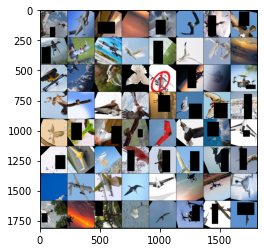

In [ ]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    plt.pause(0.001)  

# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [ ]:
device

device(type='cuda', index=0)

# Training and Evaluating Model

In [ ]:
from tqdm import notebook

graphs = {'epochs' : [], 'train_acc' : [], 'train_loss' : [], 'val_acc' : [], 'val_loss' : []}
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    tqdm_e = notebook.tqdm ([i + 1 for i in range (num_epochs)], total = num_epochs)
    for i, epoch in enumerate (tqdm_e):
        graphs['epochs'].append (epoch)
        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            print ('Training for Epoch ' + str (epoch) + '... ' + phase)
            tqdm_tl = notebook.tqdm (dataloaders[phase], total = int (len (dataloaders[phase])))
            for inputs, labels in (tqdm_tl):
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            if phase == 'val':
                graphs['val_acc'].append (epoch_acc.item ())
                graphs['val_loss'].append (epoch_loss)
            else:
                graphs['train_acc'].append (epoch_acc.item ())
                graphs['train_loss'].append (epoch_loss)

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:.4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

# Transfer learning (Loading Pretrained MobileNet_V2 Model)

In [ ]:
model_ft = models.mobilenet_v2 (pretrained=True)
model_ft.classifier[1] = torch.nn.Linear(in_features=model_ft.classifier[1].in_features, out_features=4)
model_ft = model_ft.to(device)
criterion = nn.CrossEntropyLoss()
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


# Training and Testing the Model

In [ ]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=25
                       )

Training for Epoch 1... train



train Loss: 0.5652 Acc: 0.7817
Training for Epoch 1... val



val Loss: 0.5660 Acc: 0.7725

Training for Epoch 2... train



train Loss: 0.4093 Acc: 0.8426
Training for Epoch 2... val



val Loss: 0.5056 Acc: 0.8102

Training for Epoch 3... train



train Loss: 0.3781 Acc: 0.8542
Training for Epoch 3... val



val Loss: 0.4670 Acc: 0.8193

Training for Epoch 4... train



train Loss: 0.3509 Acc: 0.8648
Training for Epoch 4... val



val Loss: 0.4480 Acc: 0.8246

Training for Epoch 5... train



train Loss: 0.3312 Acc: 0.8709
Training for Epoch 5... val



val Loss: 0.4281 Acc: 0.8318

Training for Epoch 6... train



train Loss: 0.3241 Acc: 0.8735
Training for Epoch 6... val



val Loss: 0.4427 Acc: 0.8217

Training for Epoch 7... train



train Loss: 0.3137 Acc: 0.8769
Training for Epoch 7... val



val Loss: 0.4378 Acc: 0.8284

Training for Epoch 8... train



train Loss: 0.2925 Acc: 0.8863
Training for Epoch 8... val



val Loss: 0.4068 Acc: 0.8379

Training for Epoch 9... train



train Loss: 0.2798 Acc: 0.8896
Training for Epoch 9... val



val Loss: 0.3936 Acc: 0.8432

Training for Epoch 10... train



train Loss: 0.2833 Acc: 0.8909
Training for Epoch 10... val



val Loss: 0.3991 Acc: 0.8435

Training for Epoch 11... train



train Loss: 0.2824 Acc: 0.8895
Training for Epoch 11... val



val Loss: 0.3994 Acc: 0.8427

Training for Epoch 12... train



train Loss: 0.2847 Acc: 0.8874
Training for Epoch 12... val



val Loss: 0.4036 Acc: 0.8410

Training for Epoch 13... train



train Loss: 0.2785 Acc: 0.8917
Training for Epoch 13... val



val Loss: 0.3954 Acc: 0.8423

Training for Epoch 14... train



train Loss: 0.2771 Acc: 0.8895
Training for Epoch 14... val



val Loss: 0.3968 Acc: 0.8423

Training for Epoch 15... train



train Loss: 0.2774 Acc: 0.8889
Training for Epoch 15... val



val Loss: 0.3960 Acc: 0.8438

Training for Epoch 16... train



train Loss: 0.2797 Acc: 0.8913
Training for Epoch 16... val



val Loss: 0.3895 Acc: 0.8468

Training for Epoch 17... train



train Loss: 0.2746 Acc: 0.8917
Training for Epoch 17... val



val Loss: 0.3910 Acc: 0.8451

Training for Epoch 18... train



train Loss: 0.2771 Acc: 0.8896
Training for Epoch 18... val



val Loss: 0.3961 Acc: 0.8427

Training for Epoch 19... train



train Loss: 0.2800 Acc: 0.8890
Training for Epoch 19... val



val Loss: 0.3956 Acc: 0.8413

Training for Epoch 20... train



train Loss: 0.2753 Acc: 0.8908
Training for Epoch 20... val



val Loss: 0.3986 Acc: 0.8419

Training for Epoch 21... train



train Loss: 0.2709 Acc: 0.8949
Training for Epoch 21... val



val Loss: 0.3980 Acc: 0.8432

Training for Epoch 22... train



train Loss: 0.2754 Acc: 0.8918
Training for Epoch 22... val



val Loss: 0.3940 Acc: 0.8451

Training for Epoch 23... train



train Loss: 0.2748 Acc: 0.8926
Training for Epoch 23... val



val Loss: 0.3948 Acc: 0.8443

Training for Epoch 24... train



train Loss: 0.2771 Acc: 0.8902
Training for Epoch 24... val



val Loss: 0.3939 Acc: 0.8461

Training for Epoch 25... train



train Loss: 0.2736 Acc: 0.8925
Training for Epoch 25... val



val Loss: 0.3898 Acc: 0.8472


Training complete in 58m 42s
Best val Acc: 0.8472


In [ ]:

print (graphs)

{'epochs': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25], 'train_acc': [0.7817216321967579, 0.8426495248742314, 0.8542481833426495, 0.8647987702627167, 0.8709474566797094, 0.8735326998323085, 0.8768865287870319, 0.8863191727221912, 0.8896031302403578, 0.8909306875349358, 0.8894633873672443, 0.8874371157070989, 0.8916992733370598, 0.8894633873672443, 0.8889044158747904, 0.8913499161542762, 0.8916992733370598, 0.8896031302403578, 0.8889742873113471, 0.8907909446618223, 0.8949133594186697, 0.8918390162101733, 0.8926076020122974, 0.8901621017328116, 0.8925377305757407], 'train_loss': [0.5651914749217474, 0.4092814678616734, 0.37807613128120504, 0.3509215789510259, 0.33120159644065056, 0.3241056497867311, 0.3136590641760306, 0.2924560565832542, 0.27978453461586794, 0.28325099739167464, 0.28242792754682366, 0.28466625982253096, 0.2785398369897605, 0.27710955625409317, 0.27740698516402185, 0.27970370975968023, 0.27462830898014107, 0.27711438061539

# Plotting Graphs of Training and Validation Accuracy

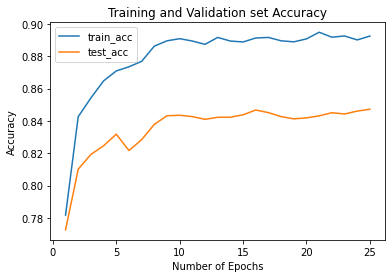

In [ ]:

plt.plot (graphs['epochs'][:25], graphs['train_acc'], label = 'train_acc')
plt.plot (graphs['epochs'][:25], graphs['val_acc'], label = 'test_acc')
plt.xlabel ('Number of Epochs')
plt.ylabel ('Accuracy')
plt.title ('Training and Validation set Accuracy')
plt.legend ()
plt.show ()


# Plotting Graphs of Training and Validation Loss

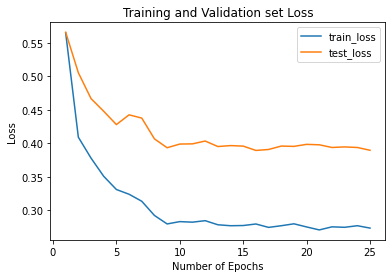

In [ ]:

plt.plot (graphs['epochs'][:25], graphs['train_loss'], label = 'train_loss')
plt.plot (graphs['epochs'][:25], graphs['val_loss'], label = 'test_loss')
plt.xlabel ('Number of Epochs')
plt.ylabel ('Loss')
plt.title ('Training and Validation set Loss')
plt.legend ()
plt.show ()

# Visualization of Misclassified Images (Classwise)

In [ ]:
def visualize_model(model, abcd, num_images=10):
    print (class_names[abcd])
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig, ax = plt.subplots (2, 5, figsize = (40, 15))
    x = 0
    y = 0

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                if labels[j] != abcd or preds[j] == labels[j]:
                    continue
                images_so_far += 1
                #ax.axis('off')
                #ax.set_title('predicted: {}'.format(class_names[preds[j]]))
                z = inputs.cpu().data[j]
                z = z.numpy().transpose((1, 2, 0))
                z = np.clip (z, 0, 1)

                ax[y, x].axis ('off')
                ax[y, x].set_title ('pred as {}'.format(class_names[preds[j]]), fontdict={'fontsize': 22, 'fontweight': 'medium'})
                ax[y, x].imshow (z)
                
                x += 1
                if x == 5:
                    y += 1
                    x = 0
                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

WingedDrones


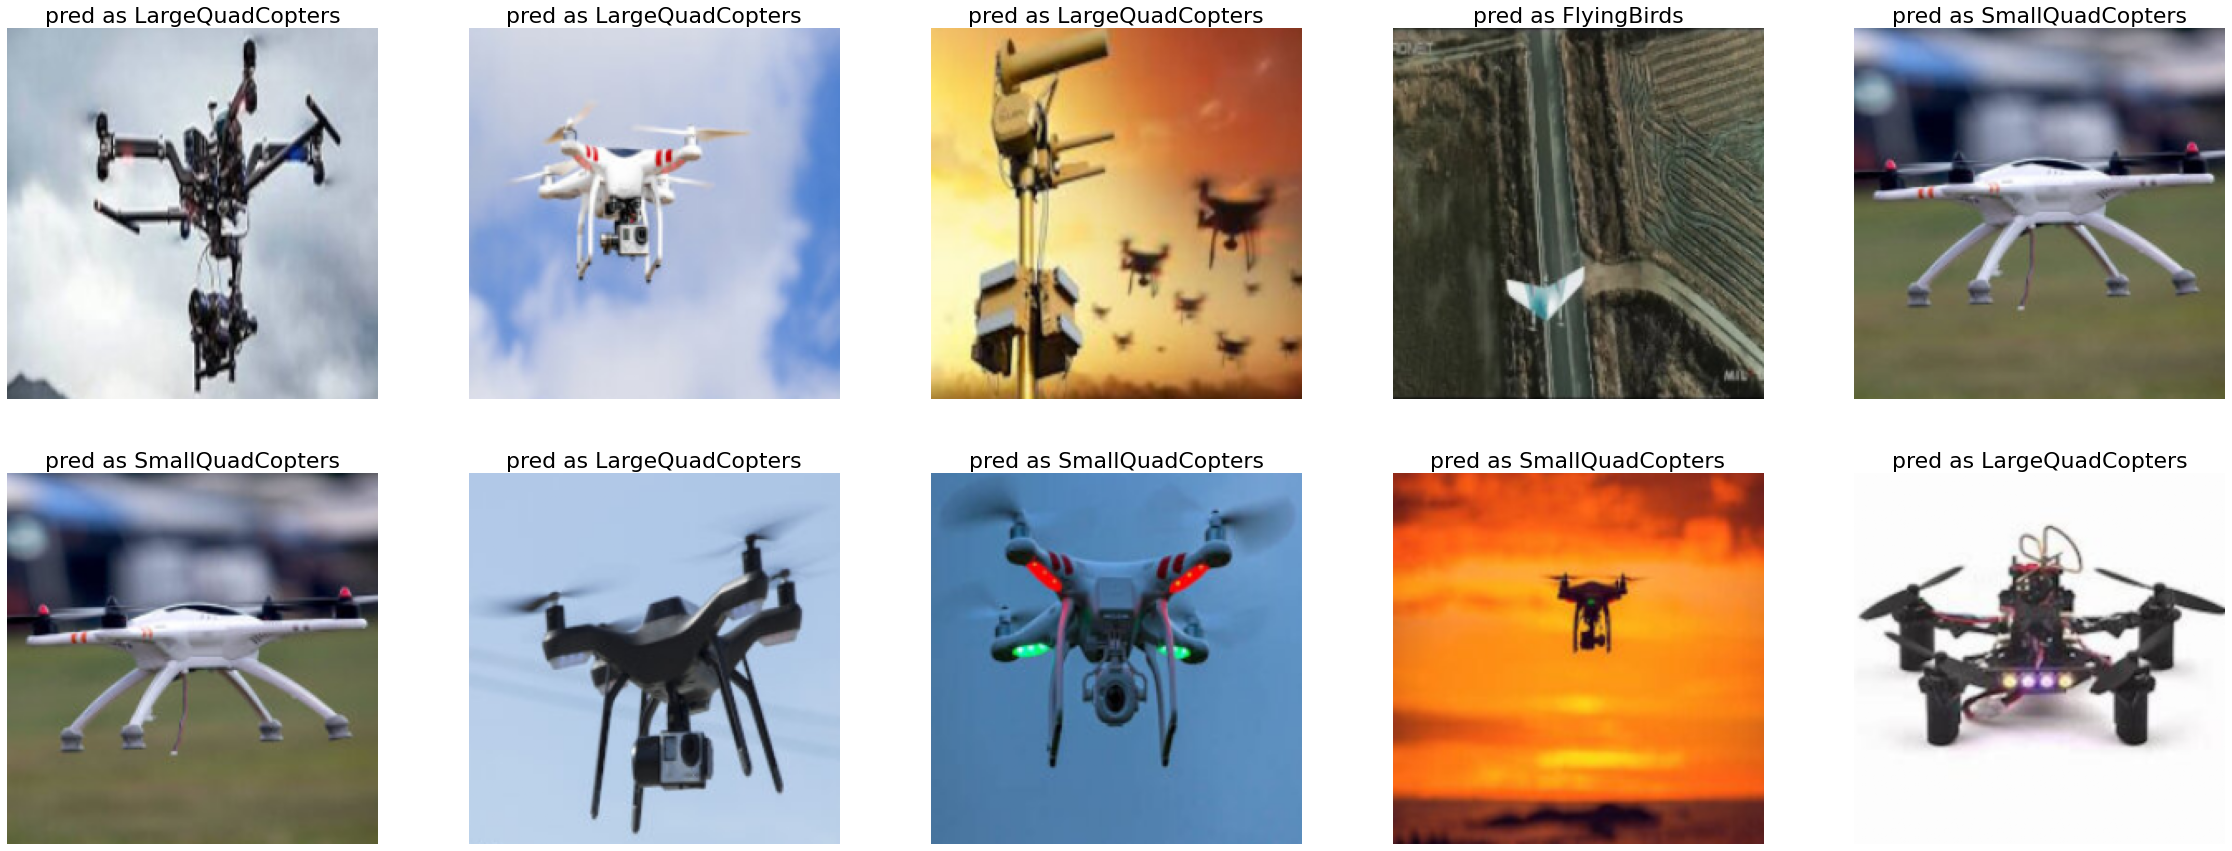

In [ ]:
visualize_model(model_ft, 3)

FlyingBirds


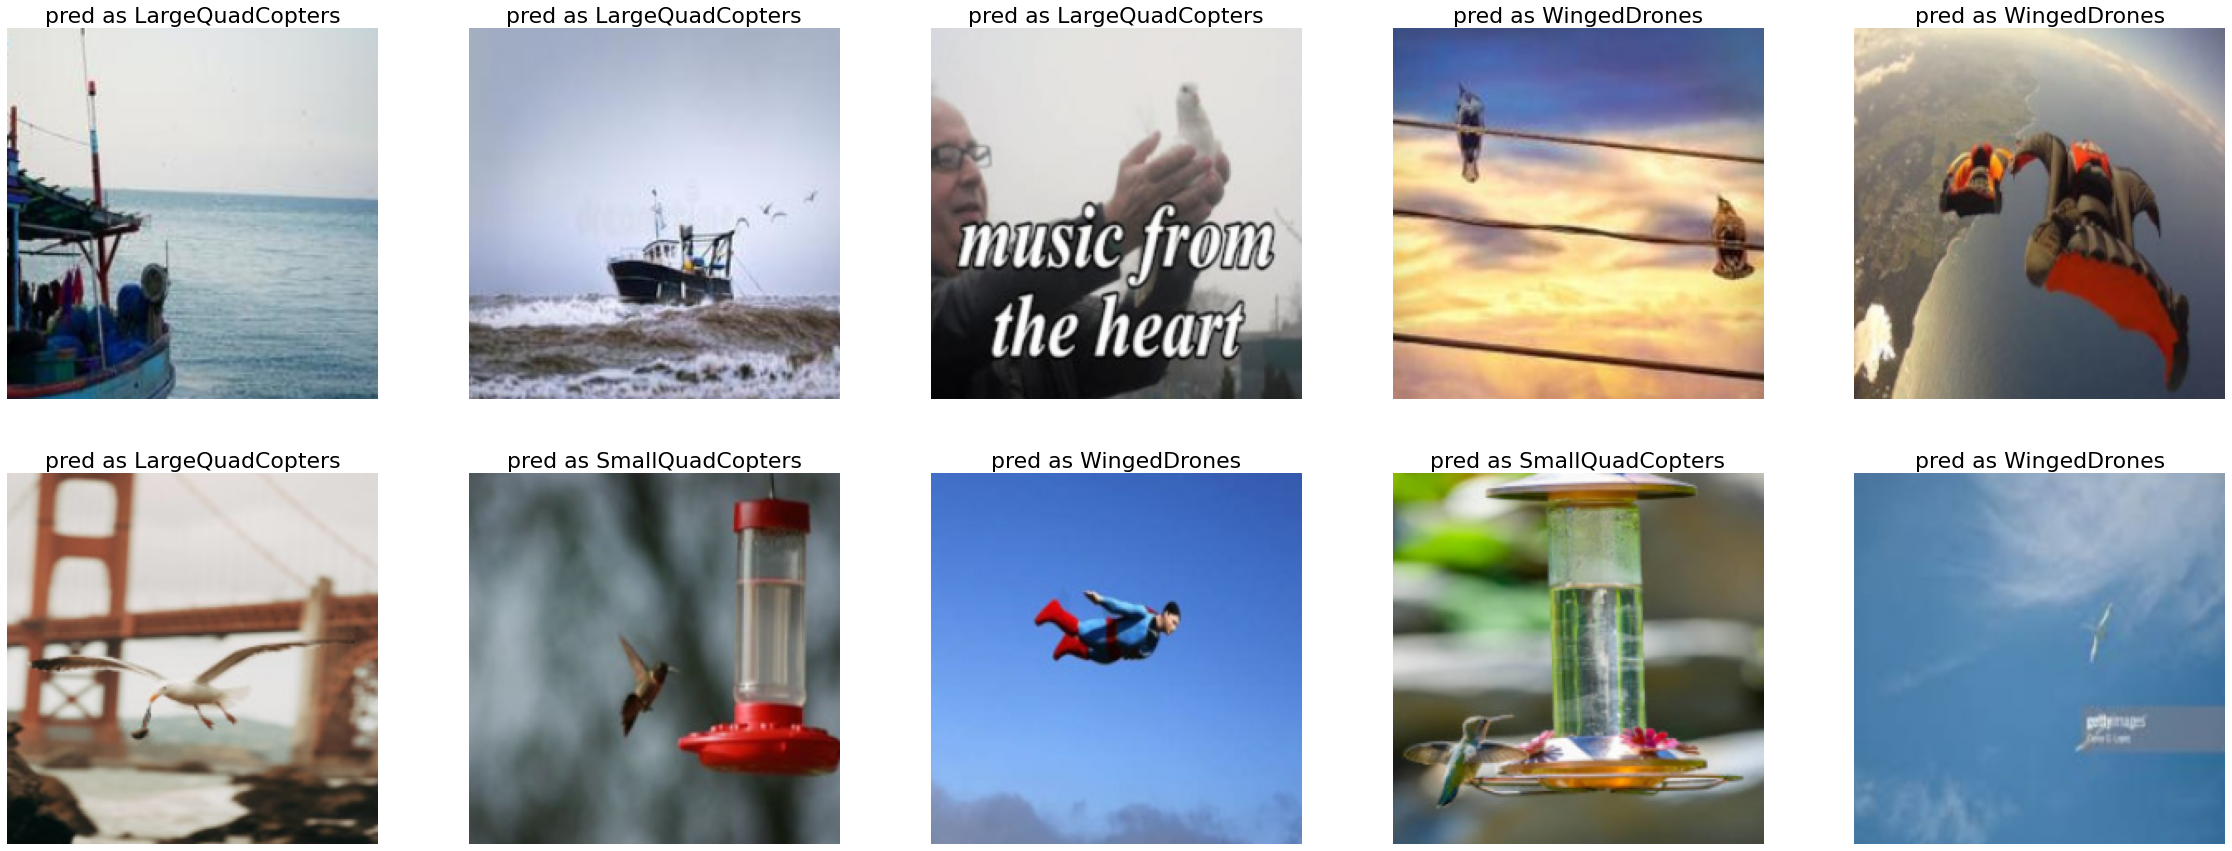

In [ ]:
visualize_model(model_ft, 0)

LargeQuadCopters


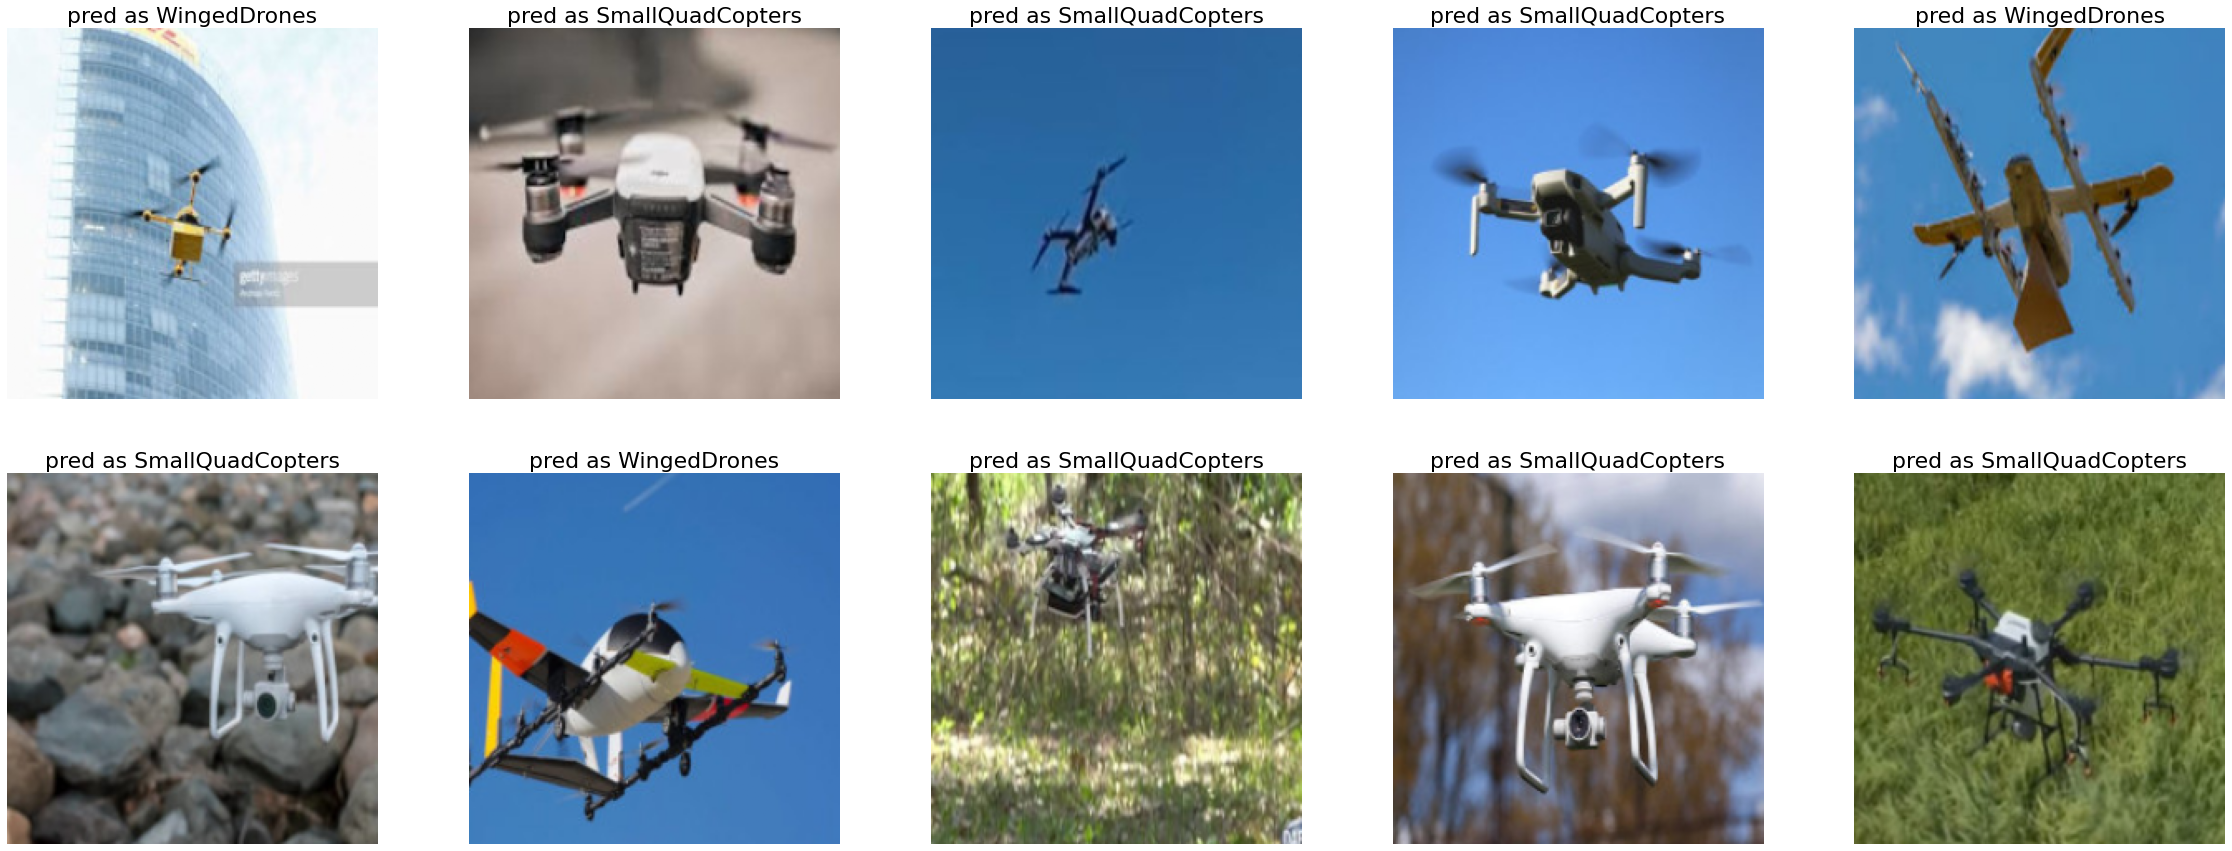

In [ ]:
visualize_model(model_ft, 1)

SmallQuadCopters


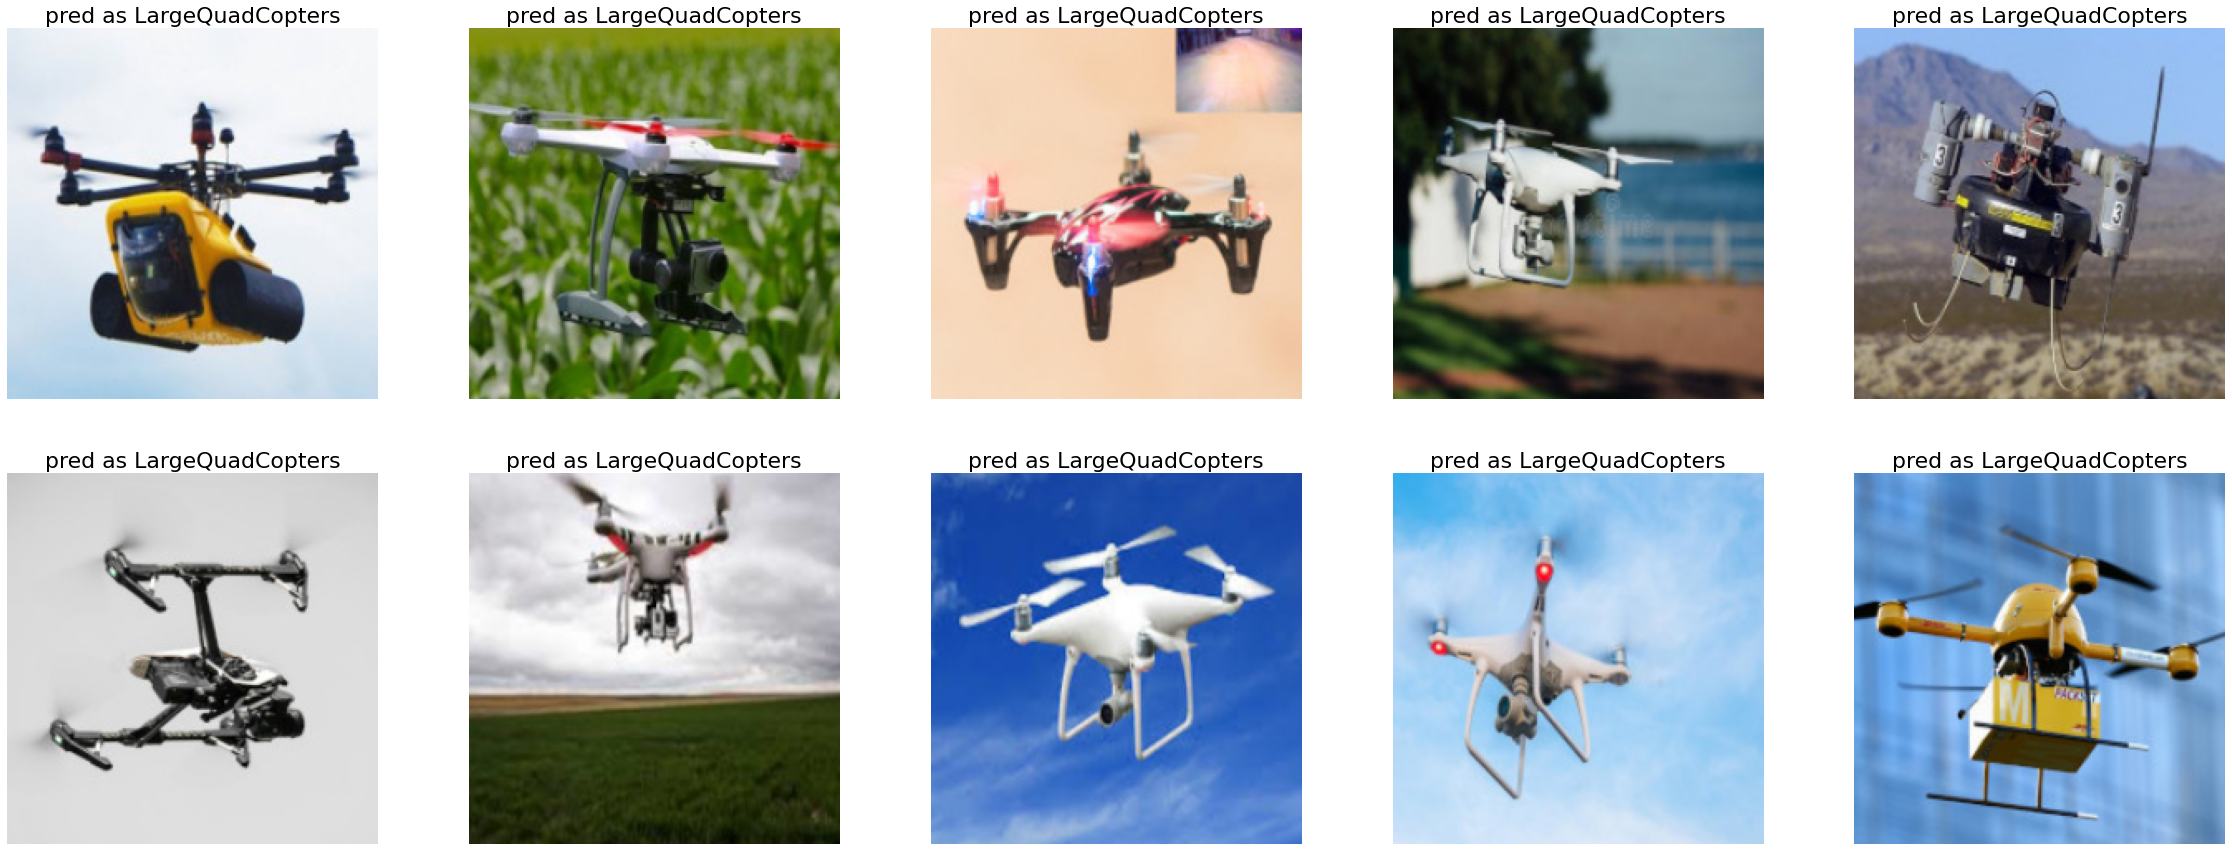

In [ ]:
visualize_model(model_ft, 2)

In [ ]:
ls

gdrive/  sample_data/


In [ ]:
cd /content/gdrive/My Drive/EVA4Phase2/Session2/

/content/gdrive/My Drive/EVA4Phase2/Session2


In [ ]:
print (model_ft)
model_ft = model_ft.to ('cpu')
model_ft.eval ()
traced_model = torch.jit.trace (model_ft, torch.randn (1, 3, 224, 224))
traced_model.save ('/content/drive/My Drive/EVA4Phase2/mobilenetv2_custom.pt')

In [ ]:
import json
with open ('/content/drive/My Drive/EVA4Phase2/Session2/class_names.json', 'w') as openfile:
  json.dump (class_names, openfile)